### 6 Likelihood

You are given a distribution defined by a mean $\mu$ and covariance matrix $\Sigma$. You are also provided with a list of samples. Your task is to detect which sample(s) do not belong to the distribution based on their likelihood, with a threshold of 0.1. Specifically, you need to identify samples whose likelihood is below 0.1.

To do this, you must implement the function below, which calculates the likelihood of each sample under a multivariate normal distribution:

$$p(x | \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)\right)$$

### Code

In [1]:
import numpy as np

def compute_log_proba(X, mean, sigma):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    return  0.5

### Run

In [2]:
# Data generation
n, d = 100, 2
np.random.seed(42)
X = np.random.rand(n, d)
mean = np.random.rand(d) * 0.5 + 0.5 
sigma = np.diag(np.random.rand(d))
print("X shape", X.shape)
print("mean", mean)
print("sigma", sigma)

X shape (100, 2)
mean [0.82101582 0.54206998]
sigma [[0.16162871 0.        ]
 [0.         0.89855419]]


In [3]:
from solutions import compute_log_proba_sol 

In [4]:
log_pro = compute_log_proba(X, mean, sigma)
log_sol = compute_log_proba_sol(X, mean, sigma)
assert np.array_equal(log_pro, log_sol), "Error: The losses are not equal"

NameError: name 'd' is not defined

### Visualization

In [14]:
threshold = np.percentile(log_sol, 50)
colors = np.ones(log_sol.shape, dtype=object) 
colors[:] = 'green'
colors[log_sol < threshold] = 'red'

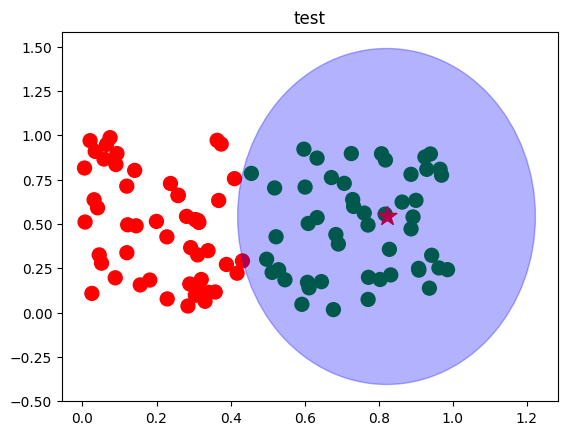

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.title("test")
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(mean[0], mean[1], marker='*', color='red', s=200)

eigvals, eigvecs = np.linalg.eig(sigma)
theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
width, height = 2 * np.sqrt(eigvals)
ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, color='blue', alpha=0.3)
plt.gca().add_patch(ellipse)

plt.show()